# Slope Constriants in Dynamic Time Wrapping (DTW) Algorithm

## Load libraries

In [52]:
import numpy as np
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt

In [2]:
import dtw as DTW_module

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



## Setup function

In [20]:
seed = 42
np.random.seed(seed)

In [21]:
def load_dataset(file_path, train=False):
    data = np.loadtxt(file_path)
    if train:
        np.random.shuffle(data)
    X = data[:,1:]
    y = data[:, 0].astype('int')
    return X, y

In [22]:
## defining each type of DTW
r = 8

dtw_rigid = lambda a, b : DTW_module.dtw(a, b, step_pattern=DTW_module.rigid, distance_only=True).normalizedDistance
dtw_symmetricP0 = lambda a, b : DTW_module.dtw(a, b, window_type="sakoechiba", distance_only=True, window_args={"window_size": r}).normalizedDistance
dtw_symmetricP05 = lambda a, b : DTW_module.dtw(a, b, window_type="sakoechiba", step_pattern=DTW_module.symmetricP05, distance_only=True, window_args={"window_size": r}).normalizedDistance
dtw_symmetricP1 = lambda a, b : DTW_module.dtw(a, b, window_type="sakoechiba", step_pattern=DTW_module.symmetricP1, distance_only=True, window_args={"window_size": r}).normalizedDistance
dtw_symmetricP2 = lambda a, b : DTW_module.dtw(a, b, window_type="sakoechiba", step_pattern=DTW_module.symmetricP2, distance_only=True, window_args={"window_size": r}).normalizedDistance

## 50words Dataset

In [138]:
X_train, y_train = load_dataset('data/50words_TRAIN', train=True) 
X_test, y_test = load_dataset('data/50words_TEST')

In [139]:
print(X_train.shape)
print(X_test.shape)

(450, 270)
(455, 270)


In [140]:
baseline = KNeighborsClassifier(metric=dtw_rigid, n_neighbors=1, n_jobs=-1) # Pinf
clf_p0 = KNeighborsClassifier(metric=dtw_symmetricP0, n_neighbors=1,n_jobs=-1)
clf_p05 = KNeighborsClassifier(metric=dtw_symmetricP05, n_neighbors=1,n_jobs=-1)
clf_p1 = KNeighborsClassifier(metric=dtw_symmetricP1, n_neighbors=1,n_jobs=-1)
clf_p2 = KNeighborsClassifier(metric=dtw_symmetricP2, n_neighbors=1,n_jobs=-1)

In [141]:
baseline.fit(X_train, y_train)
clf_p0.fit(X_train, y_train)
clf_p05.fit(X_train, y_train)
clf_p1.fit(X_train, y_train)
clf_p2.fit(X_train, y_train)

KNeighborsClassifier(metric=<function <lambda> at 0x00000296F50F15A0>,
                     n_jobs=-1, n_neighbors=1)

In [142]:
y_pred_baseline = baseline.predict(X_test)

In [143]:
y_pred_p0 = clf_p0.predict(X_test)
y_pred_p05 = clf_p05.predict(X_test)
y_pred_p1 = clf_p1.predict(X_test)
y_pred_p2 = clf_p2.predict(X_test)

In [144]:
baseline_score = accuracy_score(y_test, y_pred_baseline)
p0_score = accuracy_score(y_test, y_pred_p0)
p05_score = accuracy_score(y_test, y_pred_p05)
p1_score = accuracy_score(y_test, y_pred_p1)
p2_score = accuracy_score(y_test, y_pred_p2)

### classification report

In [145]:
print("\tbaseline (P infinity) report")
print(classification_report(y_test, y_pred_baseline))

	baseline (P infinity) report
              precision    recall  f1-score   support

           1       0.83      0.86      0.84        57
           2       0.73      0.95      0.82        42
           3       0.83      0.86      0.84        28
           4       0.58      0.65      0.61        34
           5       0.88      0.84      0.86        25
           6       0.68      0.68      0.68        19
           7       0.94      0.94      0.94        16
           8       0.75      0.92      0.83        13
           9       0.64      0.69      0.67        13
          10       0.75      0.75      0.75        12
          11       0.56      0.42      0.48        12
          12       0.50      0.44      0.47         9
          13       0.14      0.14      0.14         7
          14       0.56      0.50      0.53        10
          15       1.00      0.89      0.94         9
          16       0.60      0.75      0.67         8
          17       0.40      0.57      0.47        

e:\Programs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Programs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Programs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
print("\tsymmetric P0 report")
print(classification_report(y_test, y_pred_p0))

	symmetric P0 report
              precision    recall  f1-score   support

           1       0.91      0.93      0.92        57
           2       0.86      1.00      0.92        42
           3       0.89      0.89      0.89        28
           4       0.74      0.68      0.71        34
           5       0.88      0.88      0.88        25
           6       0.71      0.79      0.75        19
           7       0.93      0.88      0.90        16
           8       0.92      0.92      0.92        13
           9       0.85      0.85      0.85        13
          10       0.67      0.83      0.74        12
          11       0.57      0.67      0.62        12
          12       0.71      0.56      0.63         9
          13       0.57      0.57      0.57         7
          14       0.75      0.60      0.67        10
          15       0.90      1.00      0.95         9
          16       0.70      0.88      0.78         8
          17       0.38      0.43      0.40         7
      

e:\Programs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Programs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Programs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
print("\tsymmetric P0.5 report")
print(classification_report(y_test, y_pred_p05))

	symmetric P0.5 report
              precision    recall  f1-score   support

           1       0.93      0.95      0.94        57
           2       0.86      1.00      0.92        42
           3       0.92      0.86      0.89        28
           4       0.74      0.68      0.71        34
           5       0.88      0.88      0.88        25
           6       0.68      0.79      0.73        19
           7       0.93      0.88      0.90        16
           8       0.86      0.92      0.89        13
           9       0.86      0.92      0.89        13
          10       0.71      0.83      0.77        12
          11       0.57      0.67      0.62        12
          12       0.62      0.56      0.59         9
          13       0.44      0.57      0.50         7
          14       0.75      0.60      0.67        10
          15       0.82      1.00      0.90         9
          16       0.73      1.00      0.84         8
          17       0.40      0.57      0.47         7
    

e:\Programs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Programs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Programs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
print("\tsymmetric P1 report")
print(classification_report(y_test, y_pred_p1))

	symmetric P1 report
              precision    recall  f1-score   support

           1       0.90      0.95      0.92        57
           2       0.88      1.00      0.93        42
           3       0.92      0.86      0.89        28
           4       0.73      0.65      0.69        34
           5       0.88      0.88      0.88        25
           6       0.71      0.79      0.75        19
           7       0.93      0.88      0.90        16
           8       0.86      0.92      0.89        13
           9       0.85      0.85      0.85        13
          10       0.71      0.83      0.77        12
          11       0.57      0.67      0.62        12
          12       0.57      0.44      0.50         9
          13       0.44      0.57      0.50         7
          14       0.78      0.70      0.74        10
          15       0.82      1.00      0.90         9
          16       0.73      1.00      0.84         8
          17       0.36      0.57      0.44         7
      

e:\Programs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Programs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Programs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
print("\tsymmetric P2 report")
print(classification_report(y_test, y_pred_p2))

	symmetric P2 report
              precision    recall  f1-score   support

           1       0.89      0.96      0.92        57
           2       0.89      1.00      0.94        42
           3       1.00      0.86      0.92        28
           4       0.71      0.65      0.68        34
           5       0.86      0.96      0.91        25
           6       0.71      0.79      0.75        19
           7       0.94      0.94      0.94        16
           8       0.86      0.92      0.89        13
           9       0.85      0.85      0.85        13
          10       0.71      0.83      0.77        12
          11       0.60      0.75      0.67        12
          12       0.57      0.44      0.50         9
          13       0.50      0.57      0.53         7
          14       0.78      0.70      0.74        10
          15       0.82      1.00      0.90         9
          16       0.78      0.88      0.82         8
          17       0.30      0.43      0.35         7
      

e:\Programs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Programs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Programs\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### accuracy comparision

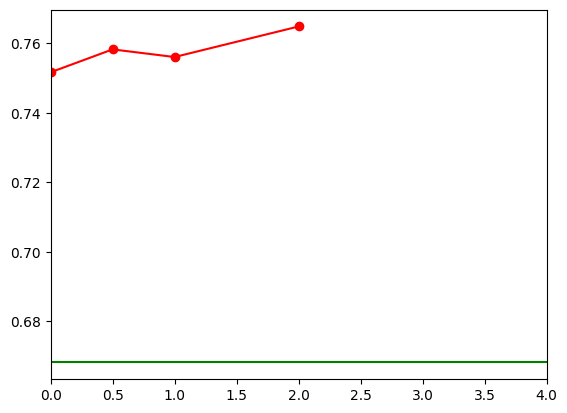

In [150]:
# plot the accuracy score for each p
x = [0, 0.5, 1, 2]
y = [p0_score, p05_score, p1_score, p2_score]

fig, ax = plt.subplots()

ax.set_xlim([0, 4])
ax.plot(x, y, 'o-r')
ax.axhline(y=baseline_score, xmin=0.0, xmax=1.0, color='g')

plt.show()

## Beef Dataset

In [113]:
X_train, y_train = load_dataset('data/Beef_TRAIN', train=True) 
X_test, y_test = load_dataset('data/Beef_TEST')

In [114]:
print(X_train.shape)
print(X_test.shape)

(30, 470)
(30, 470)


In [115]:
baseline = KNeighborsClassifier(metric=dtw_rigid, n_neighbors=1, n_jobs=-1) # Pinf
clf_p0 = KNeighborsClassifier(metric=dtw_symmetricP0, n_neighbors=1,n_jobs=-1)
clf_p05 = KNeighborsClassifier(metric=dtw_symmetricP05, n_neighbors=1,n_jobs=-1)
clf_p1 = KNeighborsClassifier(metric=dtw_symmetricP1, n_neighbors=1,n_jobs=-1)
clf_p2 = KNeighborsClassifier(metric=dtw_symmetricP2, n_neighbors=1,n_jobs=-1)

In [116]:
baseline.fit(X_train, y_train)
clf_p0.fit(X_train, y_train)
clf_p05.fit(X_train, y_train)
clf_p1.fit(X_train, y_train)
clf_p2.fit(X_train, y_train)

KNeighborsClassifier(metric=<function <lambda> at 0x00000296F50F15A0>,
                     n_jobs=-1, n_neighbors=1)

In [117]:
y_pred_baseline = baseline.predict(X_test)

In [118]:
y_pred_p0 = clf_p0.predict(X_test)
y_pred_p05 = clf_p05.predict(X_test)
y_pred_p1 = clf_p1.predict(X_test)
y_pred_p2 = clf_p2.predict(X_test)

In [119]:
baseline_score = accuracy_score(y_test, y_pred_baseline)
p0_score = accuracy_score(y_test, y_pred_p0)
p05_score = accuracy_score(y_test, y_pred_p05)
p1_score = accuracy_score(y_test, y_pred_p1)
p2_score = accuracy_score(y_test, y_pred_p2)

### classification report

In [120]:
print("\tbaseline (P infinity) report")
print(classification_report(y_test, y_pred_baseline))

	baseline (P infinity) report
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         6
           2       0.33      0.17      0.22         6
           3       0.50      0.67      0.57         6
           4       0.40      0.33      0.36         6
           5       0.33      0.33      0.33         6

    accuracy                           0.50        30
   macro avg       0.46      0.50      0.47        30
weighted avg       0.46      0.50      0.47        30



In [121]:
print("\tsymmetric P0 report")
print(classification_report(y_test, y_pred_p0))

	symmetric P0 report
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         6
           2       0.50      0.17      0.25         6
           3       0.57      0.67      0.62         6
           4       0.50      0.50      0.50         6
           5       0.43      0.50      0.46         6

    accuracy                           0.57        30
   macro avg       0.55      0.57      0.54        30
weighted avg       0.55      0.57      0.54        30



In [122]:
print("\tsymmetric P0.5 report")
print(classification_report(y_test, y_pred_p05))

	symmetric P0.5 report
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         6
           2       0.50      0.17      0.25         6
           3       0.57      0.67      0.62         6
           4       0.50      0.50      0.50         6
           5       0.43      0.50      0.46         6

    accuracy                           0.57        30
   macro avg       0.55      0.57      0.54        30
weighted avg       0.55      0.57      0.54        30



In [123]:
print("\tsymmetric P1 report")
print(classification_report(y_test, y_pred_p1))

	symmetric P1 report
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         6
           2       0.50      0.17      0.25         6
           3       0.57      0.67      0.62         6
           4       0.50      0.50      0.50         6
           5       0.43      0.50      0.46         6

    accuracy                           0.57        30
   macro avg       0.55      0.57      0.54        30
weighted avg       0.55      0.57      0.54        30



In [124]:
print("\tsymmetric P2 report")
print(classification_report(y_test, y_pred_p2))

	symmetric P2 report
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         6
           2       0.33      0.17      0.22         6
           3       0.57      0.67      0.62         6
           4       0.50      0.50      0.50         6
           5       0.33      0.33      0.33         6

    accuracy                           0.53        30
   macro avg       0.50      0.53      0.51        30
weighted avg       0.50      0.53      0.51        30



### accuracy comparision

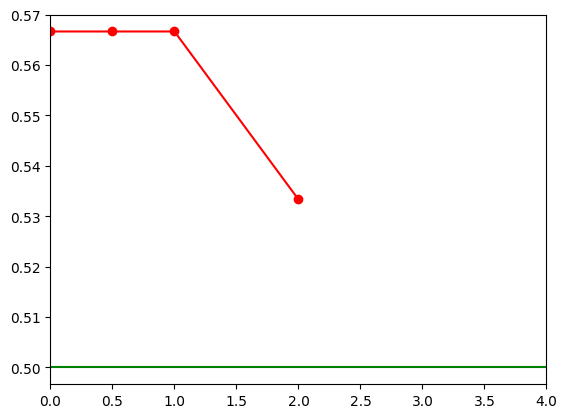

In [125]:
# plot the accuracy score for each p
x = [0, 0.5, 1, 2]
y = [p0_score, p05_score, p1_score, p2_score]

fig, ax = plt.subplots()

ax.set_xlim([0, 4])
ax.plot(x, y, 'o-r')
ax.axhline(y=baseline_score, xmin=0.0, xmax=1.0, color='g')

plt.show()

## ECG200 Dataset

In [126]:
X_train, y_train = load_dataset('data/ECG200_TRAIN', train=True) 
X_test, y_test = load_dataset('data/ECG200_TEST')

In [127]:
print(X_train.shape)
print(X_test.shape)

(100, 96)
(100, 96)


In [128]:
baseline = KNeighborsClassifier(metric=dtw_rigid, n_neighbors=1, n_jobs=-1) # Pinf
clf_p0 = KNeighborsClassifier(metric=dtw_symmetricP0, n_neighbors=1,n_jobs=-1)
clf_p05 = KNeighborsClassifier(metric=dtw_symmetricP05, n_neighbors=1,n_jobs=-1)
clf_p1 = KNeighborsClassifier(metric=dtw_symmetricP1, n_neighbors=1,n_jobs=-1)
clf_p2 = KNeighborsClassifier(metric=dtw_symmetricP2, n_neighbors=1,n_jobs=-1)

In [129]:
baseline.fit(X_train, y_train)
clf_p0.fit(X_train, y_train)
clf_p05.fit(X_train, y_train)
clf_p1.fit(X_train, y_train)
clf_p2.fit(X_train, y_train)

KNeighborsClassifier(metric=<function <lambda> at 0x00000296F50F15A0>,
                     n_jobs=-1, n_neighbors=1)

In [130]:
y_pred_baseline = baseline.predict(X_test)

In [131]:
y_pred_p0 = clf_p0.predict(X_test)
y_pred_p05 = clf_p05.predict(X_test)
y_pred_p1 = clf_p1.predict(X_test)
y_pred_p2 = clf_p2.predict(X_test)

In [132]:
baseline_score = accuracy_score(y_test, y_pred_baseline)
p0_score = accuracy_score(y_test, y_pred_p0)
p05_score = accuracy_score(y_test, y_pred_p05)
p1_score = accuracy_score(y_test, y_pred_p1)
p2_score = accuracy_score(y_test, y_pred_p2)

### classification report

In [133]:
print("\tsymmetric P0 report")
print(classification_report(y_test, y_pred_p0))

	symmetric P0 report
              precision    recall  f1-score   support

          -1       0.75      0.75      0.75        36
           1       0.86      0.86      0.86        64

    accuracy                           0.82       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.82      0.82      0.82       100



In [134]:
print("\tsymmetric P0.5 report")
print(classification_report(y_test, y_pred_p05))

	symmetric P0.5 report
              precision    recall  f1-score   support

          -1       0.81      0.72      0.76        36
           1       0.85      0.91      0.88        64

    accuracy                           0.84       100
   macro avg       0.83      0.81      0.82       100
weighted avg       0.84      0.84      0.84       100



In [135]:
print("\tsymmetric P1 report")
print(classification_report(y_test, y_pred_p1))

	symmetric P1 report
              precision    recall  f1-score   support

          -1       0.82      0.78      0.80        36
           1       0.88      0.91      0.89        64

    accuracy                           0.86       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.86      0.86      0.86       100



In [136]:
print("\tsymmetric P2 report")
print(classification_report(y_test, y_pred_p2))

	symmetric P2 report
              precision    recall  f1-score   support

          -1       0.82      0.75      0.78        36
           1       0.87      0.91      0.89        64

    accuracy                           0.85       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.85      0.85      0.85       100



### accuracy comparision

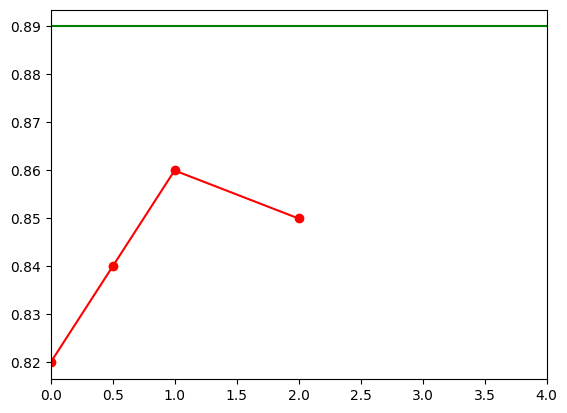

In [137]:
# plot the accuracy score for each p
x = [0, 0.5, 1, 2]
y = [p0_score, p05_score, p1_score, p2_score]

fig, ax = plt.subplots()

ax.set_xlim([0, 4])
ax.plot(x, y, 'o-r')
ax.axhline(y=baseline_score, xmin=0.0, xmax=1.0, color='g')

plt.show()